# Testing with other algos

https://towardsdatascience.com/top-machine-learning-algorithms-for-classification-2197870ff501

In [19]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
from sklearn.metrics import f1_score



import sys; sys.path.append("../../")
from modules.utils import load_yaml
from modules.evaluation import pretty_classification_report, plot_confusion_matrix

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Read Data

Note: in the submission, we cannot use `test.csv`. This has no labels and it is for submission only. So we need to use validation data as the test

--> This should be OK since the data size seems large enough

In [2]:
TRAIN_CONFIG_PATH = '../../config/train_config.yaml'
DATA_PATH = '../../data/01_split/'

config = load_yaml(TRAIN_CONFIG_PATH)
LABEL_ENCODING = config['LABEL_ENCODING']

train_df = pd.read_csv(os.path.join(DATA_PATH, 'train.csv'))
valid_df = pd.read_csv(os.path.join(DATA_PATH, 'valid.csv'))

../../config/train_config.yaml


## Split into train and test

As said, we will use val and test as the same 

In [3]:
train_X, train_y = train_df.loc[:,train_df.columns!='leaktype'], train_df['leaktype']
valid_X, valid_y = valid_df.loc[:,train_df.columns!='leaktype'], valid_df['leaktype']

train_y = train_y.replace(LABEL_ENCODING)
valid_y = valid_y.replace(LABEL_ENCODING)

# Same testing and validation
test_X, test_y = valid_X, valid_y

# Train Models

### K-Nearest Neighbours (k-NN)

In [10]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(train_X, train_y)
y_knn = knn.predict(test_X)

### Naive Bayes

In [11]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(train_X, train_y)
y_gnb = gnb.predict(test_X)

### Support Vector Machine (SVM)

In [27]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(train_X, train_y)
y_svc = svc.predict(test_X)

### Logistic Regression

In [14]:
from sklearn.linear_model import LogisticRegression

reg = LogisticRegression()
reg.fit(train_X, train_y)
y_reg = reg.predict(test_X)

/home/botu/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Decision Tree Classifier

In [15]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(train_X, train_y)
y_dtc = dtc.predict(test_X)

### Random Forest

In [16]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(train_X, train_y)
y_rfc = rfc.predict(test_X)

# Metrics evaluation

We need to get a few metrics right

In [17]:
# Encodings
encoding_to_label = {v: k for k, v in LABEL_ENCODING.items()}
labels = [key for key in LABEL_ENCODING.keys()]

F1 score : 0.785


,precision,recall,f1-score,support
0,0.932862,0.829667,0.878244,1591
1,0.880317,0.850860,0.865338,1046
2,0.980157,0.957151,0.968517,3664
3,0.495935,0.799127,0.612040,229
4,0.466859,0.852632,0.603352,190
accuracy,0.902083,0.902083,0.902083,0
macro avg,0.751226,0.857887,0.785498,6720
weighted avg,0.922405,0.902083,0.908611,6720


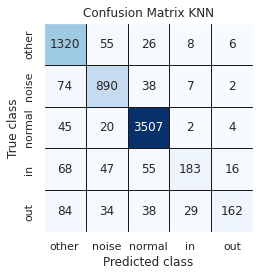

In [29]:
model_name, y_hat = 'KNN', y_knn

plot_confusion_matrix(test_y, y_hat, labels,  f'Confusion Matrix {model_name}')
print('F1 score : {:.3f}'.format(f1_score(test_y, y_hat, average='macro')))
pretty_classification_report(test_y, y_hat)


F1 score : 0.378


,precision,recall,f1-score,support
0,0.110954,0.633065,0.188815,248
1,0.483680,0.355636,0.409891,1375
2,0.932364,0.748822,0.830574,4455
3,0.211382,0.196474,0.203655,397
4,0.219020,0.310204,0.256757,245
accuracy,0.615476,0.615476,0.615476,0
macro avg,0.391480,0.448840,0.377938,6720
weighted avg,0.741643,0.615476,0.662856,6720


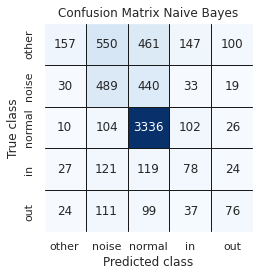

In [31]:
model_name, y_hat = 'Naive Bayes', y_gnb

plot_confusion_matrix(test_y, y_hat, labels,  f'Confusion Matrix {model_name}')
print('F1 score : {:.3f}'.format(f1_score(test_y, y_hat, average='macro')))
pretty_classification_report(test_y, y_hat)

F1 score : 0.693


,precision,recall,f1-score,support
0,0.812721,0.765136,0.788211,1503
1,0.793274,0.765267,0.779019,1048
2,0.993851,0.918863,0.954887,3870
3,0.295393,0.844961,0.437751,129
4,0.374640,0.764706,0.502901,170
accuracy,0.855208,0.855208,0.855208,0
macro avg,0.653976,0.811787,0.692554,6720
weighted avg,0.892987,0.855208,0.868820,6720


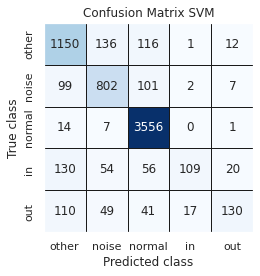

In [32]:
model_name, y_hat = 'SVM', y_svc

plot_confusion_matrix(test_y, y_hat, labels,  f'Confusion Matrix {model_name}')
print('F1 score : {:.3f}'.format(f1_score(test_y, y_hat, average='macro')))
pretty_classification_report(test_y, y_hat)

F1 score : 0.507


,precision,recall,f1-score,support
0,0.580919,0.576842,0.578873,1425
1,0.635015,0.600561,0.617308,1069
2,0.946618,0.856168,0.899124,3956
3,0.130081,0.410256,0.197531,117
4,0.175793,0.398693,0.244000,153
accuracy,0.738095,0.738095,0.738095,0
macro avg,0.493685,0.568504,0.507367,6720
weighted avg,0.787735,0.738095,0.759252,6720


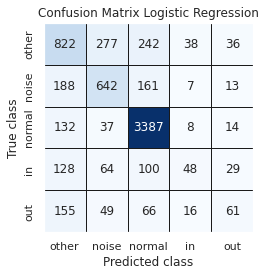

In [33]:
model_name, y_hat = 'Logistic Regression', y_reg

plot_confusion_matrix(test_y, y_hat, labels,  f'Confusion Matrix {model_name}')
print('F1 score : {:.3f}'.format(f1_score(test_y, y_hat, average='macro')))
pretty_classification_report(test_y, y_hat)

F1 score : 0.634


,precision,recall,f1-score,support
0,0.752650,0.743196,0.747893,1433
1,0.675569,0.681637,0.678589,1002
2,0.925936,0.924902,0.925419,3582
3,0.406504,0.427350,0.416667,351
4,0.406340,0.400568,0.403433,352
accuracy,0.796429,0.796429,0.796429,0
macro avg,0.633400,0.635531,0.634400,6720
weighted avg,0.797304,0.796429,0.796843,6720


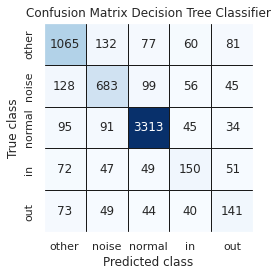

In [34]:
model_name, y_hat = 'Decision Tree Classifier', y_dtc

plot_confusion_matrix(test_y, y_hat, labels,  f'Confusion Matrix {model_name}')
print('F1 score : {:.3f}'.format(f1_score(test_y, y_hat, average='macro')))
pretty_classification_report(test_y, y_hat)

F1 score : 0.722


,precision,recall,f1-score,support
0,0.868551,0.802219,0.834069,1532
1,0.801187,0.835052,0.817769,970
2,0.990218,0.904519,0.945430,3917
3,0.338753,0.874126,0.488281,143
4,0.383285,0.841772,0.526733,158
accuracy,0.869048,0.869048,0.869048,0
macro avg,0.676399,0.851538,0.722456,6720
weighted avg,0.907062,0.869048,0.882043,6720


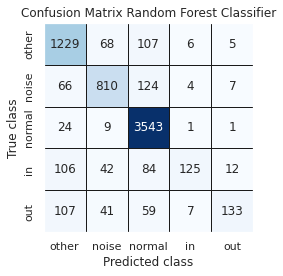

In [35]:
model_name, y_hat = 'Random Forest Classifier', y_rfc

plot_confusion_matrix(test_y, y_hat, labels,  f'Confusion Matrix {model_name}')
print('F1 score : {:.3f}'.format(f1_score(test_y, y_hat, average='macro')))
pretty_classification_report(test_y, y_hat)